## Validation dataset - EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("messages-me.evolux.cx.csv")

In [3]:
df['when'] = pd.to_datetime(df['when'], errors='coerce')

In [4]:
df.dtypes

conversation_uuid            object
uuid                         object
when                 datetime64[ns]
author                       object
content                      object
name                         object
contact_fields               object
dtype: object

In [5]:
df = df.sort_values(by=['when'])
df.reset_index(inplace=True, drop=True)

In [6]:
print(df.shape)
df.head()

(20060270, 7)


conversation_uuid                                  uuid  \
0  3d2206ba-db10-4179-9032-86c659246224  66ed09d7-a2e6-457e-9fe7-b369b095e4ac   
1  3d2206ba-db10-4179-9032-86c659246224  605a032b-414e-4de3-bb67-c0e852f7e2df   
2  fdbe2265-f5a8-431c-bc3a-f7beadfa62dd  cc56c78a-8cd3-4298-ae0b-f109bea770ec   
3  fdbe2265-f5a8-431c-bc3a-f7beadfa62dd  3794b82d-ec47-4fa8-8039-48a1216e9e96   
4  47a91bc9-601f-4ea4-9da4-13fc800d8979  f4746a74-abec-4903-9202-b35fb95219c6   

                        when   author  \
0 2024-10-01 00:00:01.922028  CONTACT   
1 2024-10-01 00:00:02.529088      BOT   
2 2024-10-01 00:00:07.402367  CONTACT   
3 2024-10-01 00:00:07.957054      BOT   
4 2024-10-01 00:00:07.965877  CONTACT   

                                             content  \
0  Eu não tô conseguindo entrar no meu SUS para p...   
1  Prezado(a) Cidadão(ã), Nosso horário de funcio...   
2                              Desbloquear senha gov   
3  Prezado(a) Cidadão(ã), Nosso horário de funcio...   
4  Dificuldade em acessar a conta gov via celular...   

                        name  \
0            Izayane Gustavo   
1                     system   
2  Roberto Takashi Fukumoto    
3                     system   
4     PRISCILA RIBEIRO SILVA   

                                      contact_fields  
0  {"name": "Izayane Gustavo", "email": "izayaneg...  
1                                                NaN  
2  {"name": "Roberto Takashi Fukumoto ", "email":...  
3                                                NaN  
4  {"name": "PRISCILA RIBEIRO SILVA", "email": "p...

In [7]:
df["conversation_uuid"].nunique()

1861615

In [8]:
df.when.max()

Timestamp('2025-04-29 23:59:54.301069')

In [9]:
for idx, row in df.iterrows():
    print(idx)
    if idx > 4:
        break

    print(row.contact_fields)
    print(row.content)
    print("#" * 50)

0
{"name": "Izayane Gustavo", "email": "izayanegustavo327@gmail.com", "organization": "Izayane Gustavo"}
Eu não tô conseguindo entrar no meu SUS para puxar minha folha
##################################################
1
nan
Prezado(a) Cidadão(ã), Nosso horário de funcionamento é de segunda à sexta de 08:00 às 18:00.
##################################################
2
{"name": "Roberto Takashi Fukumoto ", "email": "robertofukumoto6@gmail.com", "organization": "Roberto Takashi Fukumoto "}
Desbloquear senha gov
##################################################
3
nan
Prezado(a) Cidadão(ã), Nosso horário de funcionamento é de segunda à sexta de 08:00 às 18:00.
##################################################
4
{"name": "PRISCILA RIBEIRO SILVA", "email": "p_ribs@hotmail.com", "organization": "PRISCILA RIBEIRO SILVA"}
Dificuldade em acessar a conta gov via celular para criar minha assinatura digital 
##################################################
5


In [10]:
df_chat = df.loc[df['conversation_uuid'] == "b9764a88-f130-4ce1-a899-3b966115ee0c"]
df_chat.shape

(42, 7)

In [11]:

for idx, row in df_chat.iterrows():
    print(row.when, row.contact_fields)
    #print(row.name)
    print(row.content)
    print("#" * 50)

2025-01-29 13:23:07.124588 {"name": "Daksiane Freitas ", "email": "daksianefreitas@gmail.com", "organization": "Daksiane Freitas "}
TDS os e-mail rejeitados ,por algum motivo,será difícil resolver o problema da desativação??? TD o que preciso e acesso para minha carteira digital, não resolvem nada 
##################################################
2025-01-29 13:23:07.858818 nan
Olá! Você está no Chat do **Ministério da Gestão e da Inovação em Serviços Públicos**


Digite o número de qual atendimento você está buscando:


**1** - Bolsa Verde
**2** - Recuperar conta gov.br
**3** - Dúvidas para aumentar o nível da conta
**4** - Dúvidas com a verificação em duas etapas
**5** - Dúvidas no aplicativo gov.br (reconhecimento facial)
**6** - Dúvidas no aplicativo gov.br (geral)
**7** - Alterações suspeitas na conta
**8** - Sou uma Pessoa Exposta Politicamente (PEP)
**9** - Balcão GOV.BR (exclusivo para atendentes das unidades presenciais)
**10** - Outros
#######################################

### Aggregating chats

In [12]:
grouped = df.drop(columns=['when']).groupby('conversation_uuid', as_index=False)

In [13]:
#df_chats = grouped.sum()

In [14]:
hashes = "#" * 50
separator = f"\n{hashes}\n"
df_chats = grouped.agg({
    'name': 'first',
    'author': 'first', 
    'content': lambda x: separator.join(x.astype(str))
})


In [15]:
df_chats

conversation_uuid  \
0        00000300-e690-400e-a2b7-34c49c46f745   
1        0000032c-a9b6-4fcb-b546-4e29db173cb9   
2        0000136e-59fe-4f78-b913-1f66bd0765a3   
3        00001708-3f87-4c30-be69-ecf31547dd9e   
4        00001b30-7a21-4a43-a42a-25e89ae71316   
...                                       ...   
1861610  ffffe3b6-71e8-4580-a888-c564d569d1b5   
1861611  ffffea43-db98-437f-a010-6a20a780937d   
1861612  fffff3ca-1bb8-46e5-bc3a-dddfaba7de6c   
1861613  fffff598-f6e5-4c4f-a744-69098ab879fa   
1861614  fffff995-bfd0-48a5-8b75-d95455868797   

                                      name   author  \
0             OELITA CELIA DA SILVA VIEIRA  CONTACT   
1         EURINEZ RODRIGUES DE MORAES DIAS  CONTACT   
2            María das dores Luiz Targino   CONTACT   
3                                   Ângela  CONTACT   
4                                  Suzana   CONTACT   
...                                    ...      ...   
1861610           Reginaldo Moares Machado  CONTACT   
1861611                              José   CONTACT   
1861612  Marya Eduardah Ferreira Santiago   CONTACT   
1861613            dolores alberto de lima  CONTACT   
1861614             Clecia Silva da paixão  CONTACT   

                                                   content  
0        N consigo ter acesso ao app\n#################...  
1        Não estou tendo acesso ao meu  aplicativo gov....  
2        Preciso cadastrar meu INSS \n#################...  
3        Como faço para cadastrar outra conta no meu te...  
4        Não consigo de forma alguma liberar essa verif...  
...                                                    ...  
1861610  Perdi a senha \n##############################...  
1861611  Não consigo acessar a conta gov\n#############...  
1861612  Não consigo fazer o imail telefone e senha pra...  
1861613  nao consigo atualizar email e senha\n#########...  
1861614  Não consigo fazer reconhecimento facial,pra de...  

[1861615 rows x 4 columns]

In [18]:
print(df_chats.iloc[1].content)

Não estou tendo acesso ao meu  aplicativo gov.br não abre 
##################################################
Olá! Você está no Chat do **Ministério da Gestão e da Inovação em Serviços Públicos**


Digite o número de qual atendimento você está buscando:


**1** - Bolsa Verde
**2** - Recuperar conta gov.br
**3** - Dúvidas para aumentar o nível da conta
**4** - Dúvidas com a verificação em duas etapas
**5** - Dúvidas no aplicativo gov.br (reconhecimento facial)
**6** - Dúvidas no aplicativo gov.br (geral)
**7** - Alterações suspeitas na conta
**8** - Sou uma Pessoa Exposta Politicamente (PEP)
**9** - Balcão GOV.BR (exclusivo para atendentes das unidades presenciais)
**10** - Outros
##################################################
2
##################################################
Olá! Gostaríamos de informar que, no momento, o tempo de espera está um pouco maior do que o habitual. Agradecemos imensamente pela sua paciência e compreensão. Estamos trabalhando para atendê-lo(a) o mais r

In [19]:
#df_chats.to_csv("unique_chats.csv")

### Exploring dataset categories

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
import scipy.sparse

In [2]:
df_chats = pd.read_csv("unique_chats.csv")

In [3]:
print(df_chats.shape)

(1861615, 5)


In [4]:
print("1% of the dataset:")
int(df_chats.shape[0] * 0.01)

1% of the dataset:


18616

### SUBSAMPLING

In [5]:
# Vamos amostrar ~ 2% do dataset
SAMPLE_SIZE = 40000

df_chats = df_chats.sample(n=SAMPLE_SIZE, random_state=42)

In [6]:
df_chats.dropna(subset=['content'], inplace=True)
df_chats.shape

(39999, 5)

In [8]:
tfidf = TfidfVectorizer(
    stop_words=None, 
    ngram_range=(1, 3),  # Include unigrams, bigrams and trigrams
    min_df=10,  # Ignore terms that appear in less than 10 documents
    # max_df=0.95,  # Ignore terms that appear in more than 95% of documents
)

In [9]:
tfidf_matrix = tfidf.fit_transform(df_chats['content'])

In [10]:
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Number of features: {len(tfidf.get_feature_names_out())}")

TF-IDF matrix shape: (39999, 51577)
Number of features: 51577


Finding optimal number of clusters...


  0%|          | 0/8 [00:00<?, ?it/s]

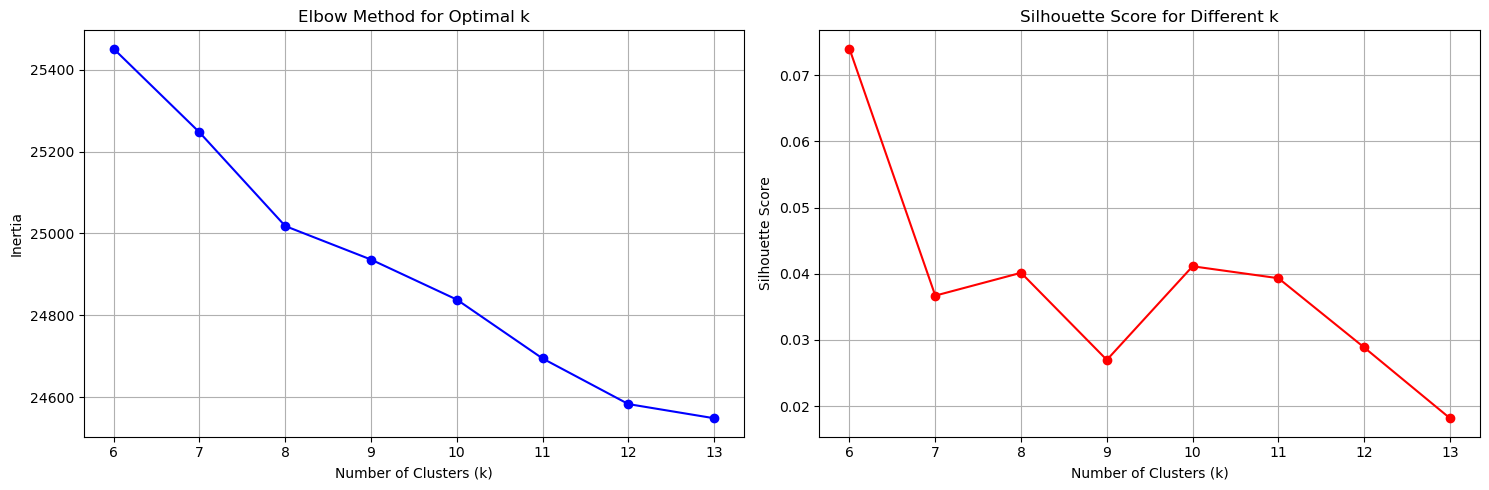

In [11]:
# Elbow method
print("Finding optimal number of clusters...")
inertias = []
silhouette_scores = []
k_range = range(6, 14)

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Different k')
ax2.grid(True)

plt.tight_layout()
plt.show()

10 possui a maior Silhouette score, ou 8 ?

além disso, ponto de "desaceleração" da inercia é em k=8

In [12]:
BREAK

NameError: name 'BREAK' is not defined

In [13]:
n_clusters = 10

In [14]:
### 

In [15]:
# Perform final clustering with specified number of clusters
print(f"Performing K-means clustering with {n_clusters} clusters...")
kmeans_final = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(tfidf_matrix)

# Add cluster labels to dataframe
df_chats['cluster'] = cluster_labels

# Calculate silhouette score for final clustering
final_silhouette = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Final silhouette score: {final_silhouette:.3f}")


Performing K-means clustering with 10 clusters...
Final silhouette score: 0.041


In [16]:
df_chats.to_csv("unique_chats_CLUSTERED.csv")

In [17]:
tfidf_matrix

<39999x51577 sparse matrix of type '<class 'numpy.float64'>'
	with 14688583 stored elements in Compressed Sparse Row format>

In [18]:

# Save the sparse matrix
scipy.sparse.save_npz('tfidf_matrix.npz', tfidf_matrix)

### LOAD tf-idf matrix + clustered chats

In [2]:
# Load it back
tfidf_matrix = scipy.sparse.load_npz('tfidf_matrix.npz')
df_chats = pd.read_csv("unique_chats_CLUSTERED.csv")
# n_clusters = 10


Cluster Analysis:

Cluster 0 (5988 messages):
------------------------------
Top terms: 00, de, de 08, prezado cidadão nosso, cidadão nosso, cidadão nosso horário, sexta de, às 18, de funcionamento de, segunda sexta de
Sample messages:
  1. Gostaria de saber uma informação que consta em minha carteira digital 
#############################...
  2. Boa noite, não consigo fazer meu reconhecimento facial 
############################################...
  3. Não consigo criar uma conta no gov faz tempo que eu tento e não consigo eu coloco em criar conta mas...

Cluster 1 (862 messages):
------------------------------
Top terms: br, gov br, gov, você, dúvidas, em, está, conta, atendimento, seu
Sample messages:
  1. Não estou conseguindo fazer a verificação por foto para recuperar a senha 
#########################...
  2. Não consigo enviar a selfie 
##################################################
Olá! Você está no Ch...
  3. Não consigo entra na carteira digital
#######################

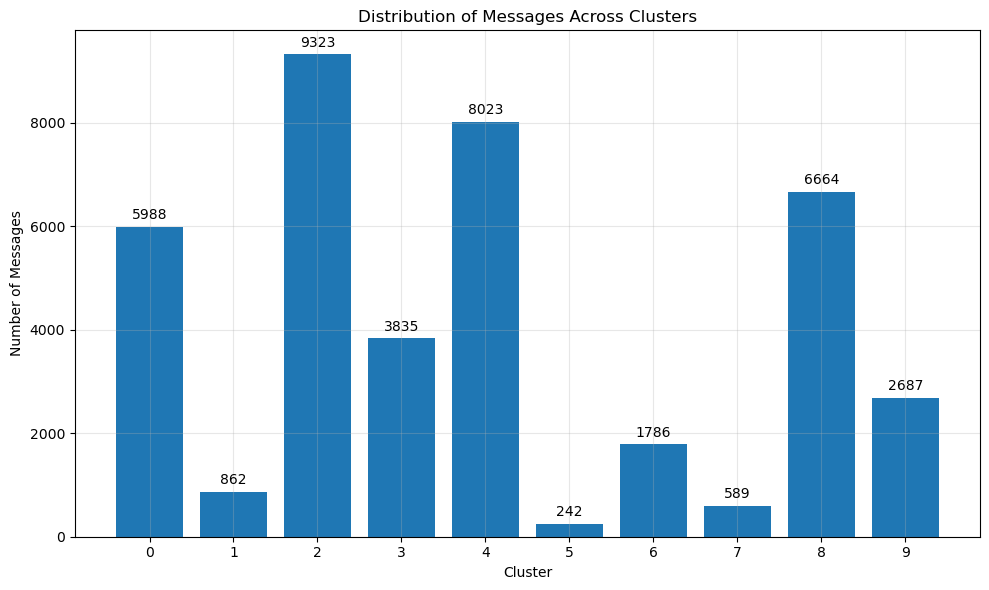

In [20]:
# Analyze clusters
print("\nCluster Analysis:")
print("="*50)

for i in range(n_clusters):
    cluster_texts = df_chats[df_chats['cluster'] == i]['content']
    print(f"\nCluster {i} ({len(cluster_texts)} messages):")
    print("-" * 30)
    
    # Get top terms for this cluster
    cluster_center = kmeans_final.cluster_centers_[i]
    top_indices = cluster_center.argsort()[-10:][::-1]
    top_terms = [tfidf.get_feature_names_out()[idx] for idx in top_indices]
    print(f"Top terms: {', '.join(top_terms)}")
    
    # Show sample messages from this cluster
    sample_messages = cluster_texts.head(3).tolist()
    print("Sample messages:")
    for j, msg in enumerate(sample_messages, 1):
        print(f"  {j}. {msg[:100]}...")

# Create cluster distribution plot
plt.figure(figsize=(10, 6))
cluster_counts = Counter(cluster_labels)
clusters = list(cluster_counts.keys())
counts = list(cluster_counts.values())

plt.bar(clusters, counts)
plt.xlabel('Cluster')
plt.ylabel('Number of Messages')
plt.title('Distribution of Messages Across Clusters')
plt.xticks(clusters)
plt.grid(True, alpha=0.3)

for cluster_id, count in zip(clusters, counts):
    plt.text(cluster_id, count + max(counts) * 0.01, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Cluster visualization

In [3]:
from visualizations import create_3d_cluster_visualization, create_2d_comparison_plots

In [4]:
df_chats[(df_chats['content'] == "1")]

Unnamed: 0.1  Unnamed: 0                     conversation_uuid  \
11607       1784610     1784610  f5729994-cda2-405b-897b-792d75cb18e2   
14791       1572491     1572491  d83c51aa-ab0e-41c4-9413-ad2e944fa32a   
16424        947389      947389  825741a0-6a0b-4e0b-919e-50e11a45ce41   
30780       1312521     1312521  b4855162-b235-435e-8a98-f3c78cbfd75f   
33704       1540699     1540699  d3ddc7bc-ca0b-4efc-9ea8-0932365453cc   
37228        430207      430207  3b2f5967-439a-443a-92dc-4809793211df   

                                       name   author content  cluster  
11607                         Fabio Camacho  CONTACT       1        0  
14791  Alessandra coelho da Silva Oliveira   CONTACT       1        0  
16424                 ROBSON GARRRIDOCALDAS  CONTACT       1        0  
30780                   neusa maria martins  CONTACT       1        0  
33704              Edna Maria Soares Silva   CONTACT       1        0  
37228                Reginaldo Mota Simões   CONTACT       1        0

Sampling 10000 points from 39999 total points for visualization...
Computing t-SNE 3D embedding...


/home/cmoryah/anaconda3/envs/chatbot/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Using IQR method for outlier detection...
   Dimension 0: removed 0 outliers (bounds: -56.18 to 57.26)
   Dimension 1: removed 0 outliers (bounds: -57.79 to 60.04)
   Dimension 2: removed 0 outliers (bounds: -52.88 to 54.22)
Total outliers removed: 0/10000 (0.0%)
Remaining points: 10000


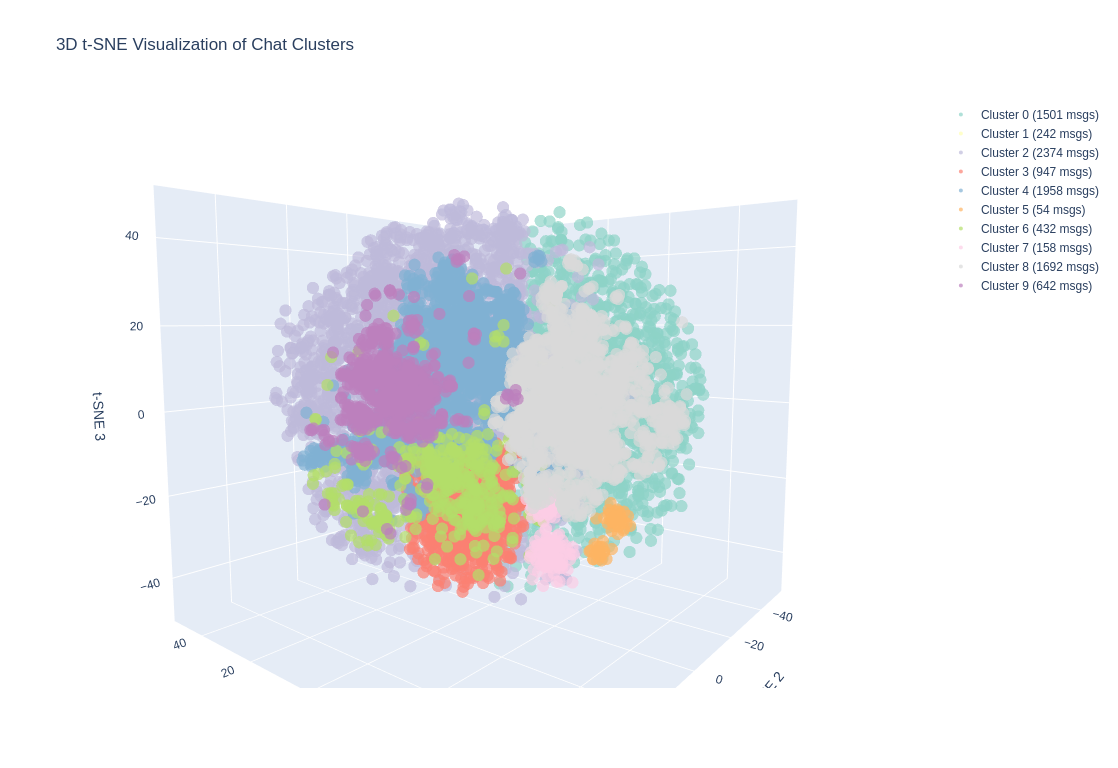

Computing PCA 3D embedding...


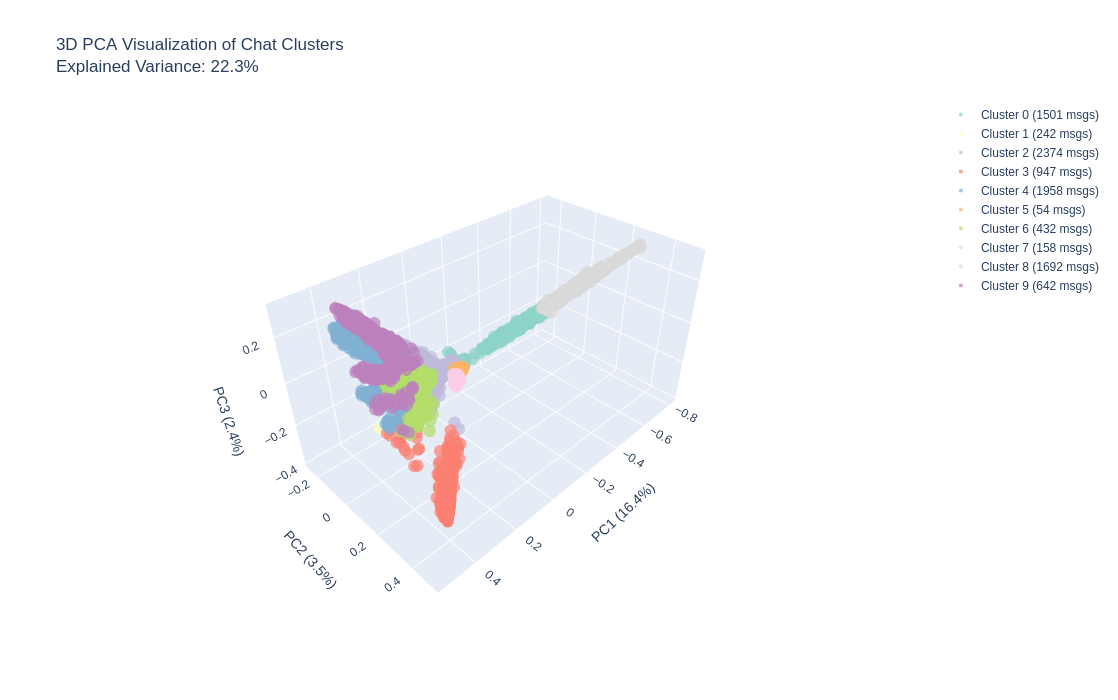

In [5]:
tsne_coords, pca_coords = create_3d_cluster_visualization(
    df_chats, tfidf_matrix, method='both', sample_size=10000
)
39999
# tsne_coords, _ = create_3d_cluster_visualization(
#     df_chats, tfidf_matrix, method='tsne', 
#     remove_outliers=True, outlier_method='iqr', outlier_factor=1.5
# )

Computing 2D embeddings for comparison...


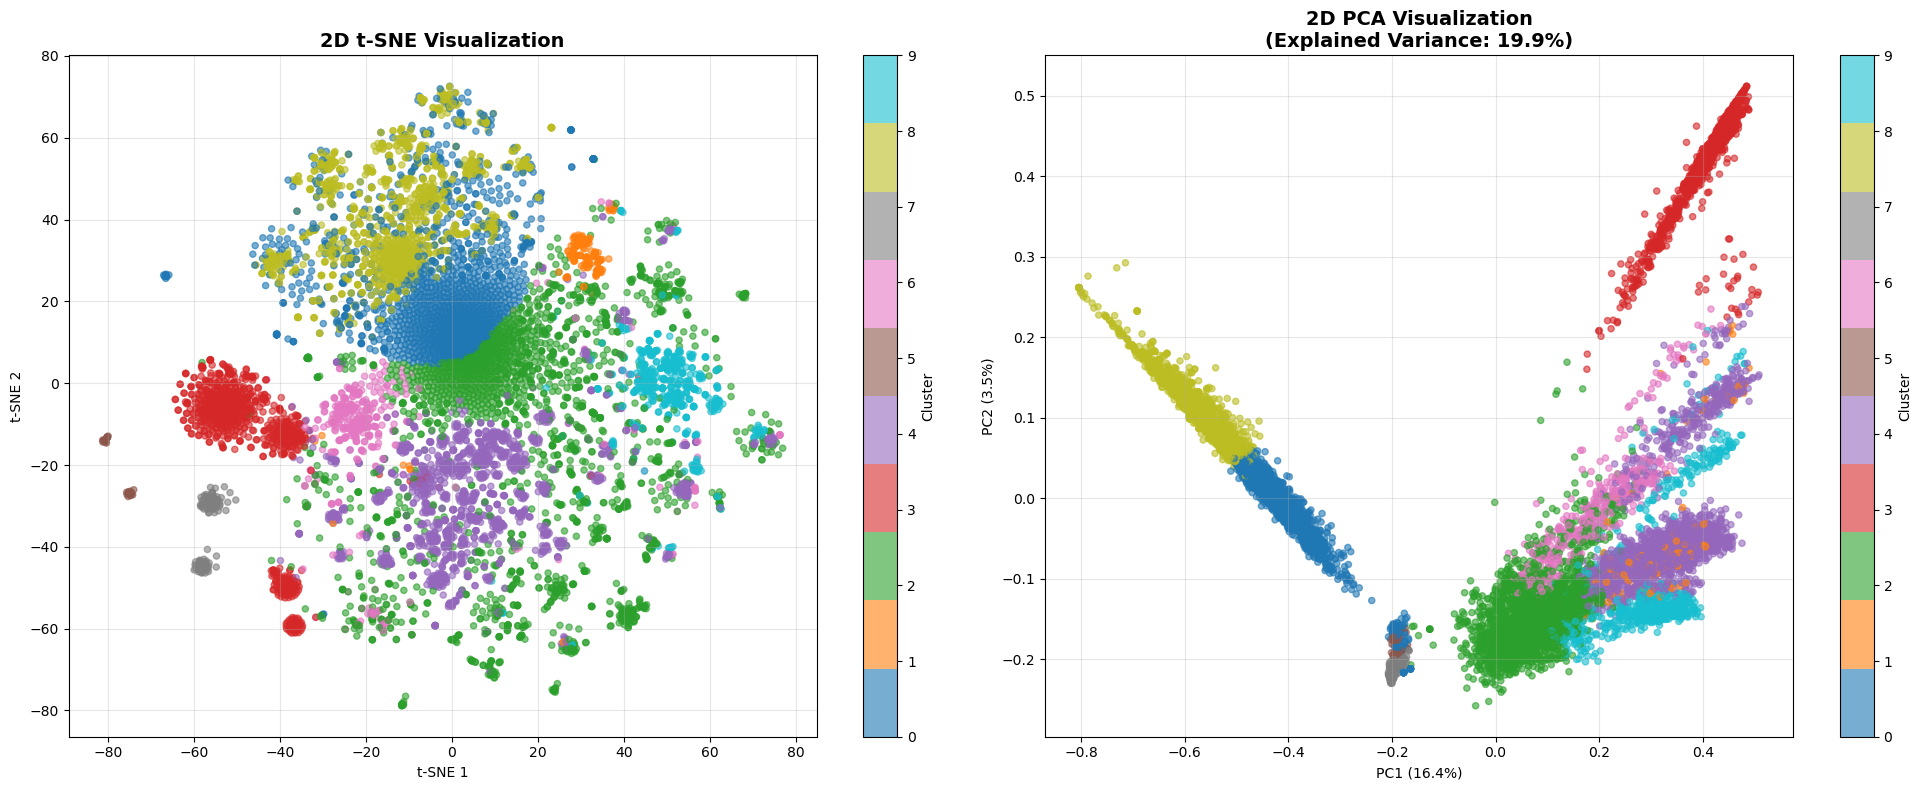

In [6]:
# Create 2D comparison plots
tsne_2d, pca_2d = create_2d_comparison_plots(df_chats, tfidf_matrix, sample_size=10000)
